# Introductory Circuit

First import packages

In [8]:
# instructions of the quantum circuit
from qiskit import QuantumCircuit, transpile

# aer high performance simulator
from qiskit_aer import AerSimulator

# histograms
from qiskit.visualization import plot_histogram

Initializing simulator and circuit with 2 qubits in the zero state

In [2]:
simulator = AerSimulator()
circuit = QuantumCircuit(2, 2)

Applying quantum gates to the circuit

In [3]:
# hadamard gate on qubit 0 (superposition)
circuit.h(0)

# controlled not on qubit 0 and target qubit 1, they are now entangled 
circuit.cx(0, 1)

# if you pass the entire quantum and classical registers to measure, the ith qubit’s measurement result will be stored in the ith classical bit.
circuit.measure([0, 1], [0, 1])

In [4]:
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()

In [5]:
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)


Total count for 00 and 11 are: {'11': 4922, '00': 5078}


In [6]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

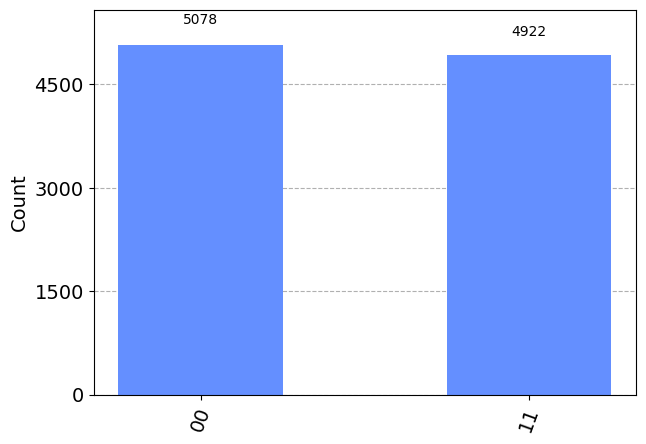

In [7]:
plot_histogram(counts)